# Team Details

* **Team ID** : 12
* **Semester** : 5
* **Division** : B
* **Department** : CSE

# Project Details



*   **Title Id** : 5DMACP06
*   **Project Title** : Soft Sensing Prediction



# Team Member Details



---

251 - 01fe19bcs126 - Siri Revant

---

254 - 01fe19bcs131 - Dhananjay K

---

256 - 01fe19bcs278 - Leelaprasad P - Leader

---

267 - 01fe20bcs411 - Shreesh Bhat

---



# **Programming**

### Importing Modules

In [17]:
# To Load Data from numpy files
import numpy as np
# Converting numpy to CSV
import csv
# Pandas to read CSV
import pandas as pd

# For splitting Dataset to train and test
from sklearn.model_selection import train_test_split
# For Logistic Regression - Learning Model
from sklearn.linear_model import LogisticRegression
# For Decision Tree Classifier - Learning Model
from sklearn.tree import DecisionTreeClassifier


# To save and load the model
from sklearn import model_selection
import pickle

# For AUC evaluation metric
from sklearn import metrics

# FOr KNN classifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
%pylab inline

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### Reading Input Files

In [ ]:
print("Started reading Input files...")
x_train = np.load('./datasets/X_train.npy')
x_val = np.load('./datasets/X_val.npy')
x_test = np.load('./datasets/X_test.npy')
print("Completed reading Input files...")

Started reading Input files...
Completed reading Input files...


### Reading Output Files

In [ ]:
print("Started reading Output files...")
label_train = np.load('./datasets/label_train.npy')
label_val = np.load('./datasets/label_val.npy')
print("Completed reading Input files...")

Started reading Output files...
Completed reading Input files...


### Creating CSV Files

In [ ]:
# Accessing 1 Lakh tuples
samples = x_train[:100000]
# Finding Length of samples i.e, Number of tuples
sample_len = len(samples)
#storing number of timesteps and features
time_step_len = 2
features_len = len(samples[0][0])
print("Sample Created")

Sample Created


In [ ]:
print(sample_len,time_step_len,features_len)

rows = []
for i in range(sample_len):
  for j in range(time_step_len):
    t = [i,j]
    # Creating a list for each time-step of sample
    t.extend(samples[i][j])
    # Appending that list with the output labels
    t.extend(label_train[i])
    #Rows contain Final List of samples
    rows.append(t)

100000 2 817


In [ ]:
print("Creating CSV file")
# Headings for that CSV
heading = ['Sample', 'time_step']
# Feature Headings
t = list(range(1,818))
heading.extend(t)
# Label Headings
t = list(range(1,23))
heading.extend(t)

# Path of saving file and filename
filename = "./datasets/csv/x_train.csv"

# Opening file in write mode
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile) 
    #Write Headings
    csvwriter.writerow(heading) 
    #Write Values
    csvwriter.writerows(rows)
print("CSV file Created")

Creating CSV file
CSV file Created


### Save And Load Model

In [ ]:
def saveModel(label,model):
  filename = './datasets/model/weights-label-'+ str(label) +'.sav'
  # filename = '/content/drive/MyDrive/Course Projects/Project DMA/Data/Junk/weights-label-'+ str(label) +'.sav'
  pickle.dump(model, open(filename, 'wb'))

In [ ]:
def loadModel(label):
  filename = './datsets/model/weights-label-'+ str(label) +'.sav'
  return pickle.load(open(filename, 'rb'))

# Training and Testing Data

## Model - 1

##### **Training Data**

##### Reading file

In [ ]:
print("Started Reading CSV file")
# Reading the CSV file
x_train = pd.read_csv('./datasets/csv/x_train.csv')
print("Completed Reading CSV file")

Started Reading CSV file
Completed Reading CSV file


In [ ]:
x_train.head()

,Sample,time_step,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.093656,0.137056,0.040404,0.020833,0.023638,0.020619,1.0,0.428669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,1.000000,0.187817,1.000000,0.020833,0.075026,0.072165,1.0,0.000557,0.342661,0.293380,0.444333,0.265162,0.463364,0.460963,0.704678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.648454,1.0,1.000000,0.187817,1.000000,0.020833,0.075026,0.072165,1.0,0.000557,0.341336,0.293380,0.418532,0.250007,0.458151,0.455002,0.560137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.093656,0.137056,0.040404,0.010417,0.023638,0.020619,1.0,0.146608,0.385084,0.023991,0.204508,0.142721,0.104954,0.056231,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Storing all column names in variable column
col = x_train.columns
col

Index(['Sample', 'time_step', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '13.1', '14.1', '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1',
       '22.1'],
      dtype='object', length=841)

In [ ]:
# Storing Feature columns excluding last 22 label columns
feat_col = col[:-22]
feat_col

Index(['Sample', 'time_step', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '808', '809', '810', '811', '812', '813', '814', '815', '816', '817'],
      dtype='object', length=819)

##### Training

In [ ]:
# Warning....!

predictiedScore = []

# Creates Learning Models - for 22 labels
def train():
  for i in range(-22,0,1):

    # Target Label - i.e, Predicting Label
    target = col[i]

      print("Started Creating Learning Model for Label : ",23+i)

      # Train Dataset: Used to fit the machine learning model.
      # Test Dataset: Used to evaluate the fit machine learning model.
      
      # Parameters
      #   * x_train[feat_col] - Passing all columns except labels
      #   * x_train[target] - Passing target column i.e, label that is to be predicted
      #   * test_size(0.2) - divides the sample of 20% test and 80% train

      X_train, X_test, y_train, y_test = train_test_split(x_train[feat_col],x_train[target],test_size=0.2)
      
      # Creating Instance of Model LogisticRegression
      model = LogisticRegression()

      # Creating the Learning model - Training
      model.fit(X_train,y_train)

      # Saving the model to device
      saveModel(23+i,model)

      # Scores are Predicted and stored in list predictedScore
      predictedScore.append(model.score(X_test,y_test))

      print("Model Completed")


In [ ]:
models = []

# Loading the models from device
def loadModels():

  # For 22 - Labels models are loaded
  
      model = loadModel(i)
      # Each model is appended to models
      models.append(model)

In [ ]:
predictedScore = []

def predictScore():
  t = 0
  for i in range(-22,0,1):
    target = col[-1*i]
    if(23+i==9 or 23+i==10 or 23+i==21):
      continue
    else:
      print("Predicting Score for -",23+i)
      X_train, X_test, y_train, y_test = train_test_split(x_train[feat_col],x_train[target],test_size=0.1)
      predictedScore.append(models[t].score(X_test,y_test))
      t+=1
      print("Prediction Completed")

In [ ]:
# Creating Model and saving the weights
train() # Warning...!

Started Creating Learning Model for Label :  1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  2
Model Completed
Started Creating Learning Model for Label :  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  11
Model Completed
Started Creating Learning Model for Label :  12
Model Completed
Started Creating Learning Model for Label :  13
Model Completed
Started Creating Learning Model for Label :  14


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  15
Model Completed
Started Creating Learning Model for Label :  16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  17
Model Completed
Started Creating Learning Model for Label :  18
Model Completed
Started Creating Learning Model for Label :  19


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  20


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Completed
Started Creating Learning Model for Label :  22
Model Completed


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Loading models and Predicting the score
loadModels()
predictScore()

Predicting Score for - 1
Prediction Completed
Predicting Score for - 2
Prediction Completed
Predicting Score for - 3
Prediction Completed
Predicting Score for - 4
Prediction Completed
Predicting Score for - 5
Prediction Completed
Predicting Score for - 6
Prediction Completed
Predicting Score for - 7
Prediction Completed
Predicting Score for - 8
Prediction Completed
Predicting Score for - 11
Prediction Completed
Predicting Score for - 12
Prediction Completed
Predicting Score for - 13
Prediction Completed
Predicting Score for - 14
Prediction Completed
Predicting Score for - 15
Prediction Completed
Predicting Score for - 16
Prediction Completed
Predicting Score for - 17
Prediction Completed
Predicting Score for - 18
Prediction Completed
Predicting Score for - 19
Prediction Completed
Predicting Score for - 20
Prediction Completed
Predicting Score for - 22
Prediction Completed


In [ ]:
# Printing the Predicted Score

l = len(predictedScore)
t = 0
for i in range(l):
  if(i==8):
    t += 2
    i += 1
  elif(i==20):
    t += 1
  print('Label_'+str(t+1),'-',predictedScore[i])
  t += 1

Label_1 - 0.99995
Label_2 - 1.0
Label_3 - 1.0
Label_4 - 1.0
Label_5 - 0.99985
Label_6 - 0.99985
Label_7 - 0.9999
Label_8 - 0.99995
Label_11 - 0.99965
Label_12 - 0.99965
Label_13 - 0.99995
Label_14 - 1.0
Label_15 - 0.9991
Label_16 - 1.0
Label_17 - 1.0
Label_18 - 1.0
Label_19 - 1.0
Label_20 - 1.0
Label_21 - 0.9999


##### **Testing Data**

##### Reading file

In [ ]:
print("Started Reading CSV file")
# Reading the CSV file
x_val = pd.read_csv('./datasets/csv/x_val.csv')
print("Completed Reading CSV file")

Started Reading CSV file
Completed Reading CSV file


In [ ]:
x_val.head()

,Sample,time_step,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.003021,0.027411,0.000000,0.020833,0.003083,0.005155,0.0,0.058656,0.521141,0.033258,0.129448,0.295502,0.355786,0.175906,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.645161,1.0,0.003021,0.027411,0.000000,0.020833,0.003083,0.005155,0.0,0.048999,0.521141,0.033258,0.101723,0.258519,0.340466,0.132045,0.862366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.000000,0.025381,0.015152,0.020833,0.003083,0.005155,0.0,0.066625,0.318178,0.227976,0.294034,0.436202,0.458733,0.345030,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.371212,1.0,0.000000,0.025381,0.015152,0.020833,0.003083,0.005155,0.0,0.066625,0.318178,0.227976,0.303718,0.461383,0.470957,0.375191,0.806061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.008056,0.027411,0.000000,0.020833,0.003083,0.005155,0.0,0.133712,0.517298,0.022790,0.538958,0.362442,0.343434,0.244955,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Storing all column names in variable column
col = x_val.columns
col

Index(['Sample', 'time_step', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '13.1', '14.1', '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1',
       '22.1'],
      dtype='object', length=841)

In [ ]:
# Storing Feature columns excluding last 22 label columns
feat_col = col[:-22]
feat_col

Index(['Sample', 'time_step', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '808', '809', '810', '811', '812', '813', '814', '815', '816', '817'],
      dtype='object', length=819)

##### Testing

In [ ]:
predictedScore = []

def predictScore():
  t = 0
  for i in range(-22,0,1):
    target = col[-1*i]
    if(23+i==9 or 23+i==10 or 23+i==21):
      continue
    else:
      print("Predicting Score for -",23+i)
      X_train, X_test, y_train, y_test = train_test_split(x_val[feat_col],x_val[target],test_size=0.99)
      predictedScore.append(models[t].score(X_test,y_test))
      t+=1
      print("Prediction Completed")

In [ ]:
# Loading models and Predicting the score
loadModels()
predictScore()

Predicting Score for - 1
Prediction Completed
Predicting Score for - 2
Prediction Completed
Predicting Score for - 3
Prediction Completed
Predicting Score for - 4
Prediction Completed
Predicting Score for - 5
Prediction Completed
Predicting Score for - 6
Prediction Completed
Predicting Score for - 7
Prediction Completed
Predicting Score for - 8
Prediction Completed
Predicting Score for - 11
Prediction Completed
Predicting Score for - 12
Prediction Completed
Predicting Score for - 13
Prediction Completed
Predicting Score for - 14
Prediction Completed
Predicting Score for - 15
Prediction Completed
Predicting Score for - 16
Prediction Completed
Predicting Score for - 17
Prediction Completed
Predicting Score for - 18
Prediction Completed
Predicting Score for - 19
Prediction Completed
Predicting Score for - 20
Prediction Completed
Predicting Score for - 22
Prediction Completed


In [ ]:
# Printing the Predicted Score

l = len(predictedScore)
t = 0
for i in range(l):
  if(i==8):
    t += 2
    i += 1
  elif(i==20):
    t += 1
  print('Label_'+str(t+1),'-',predictedScore[i])
  t += 1

Label_1 - 1.0
Label_2 - 1.0
Label_3 - 1.0
Label_4 - 1.0
Label_5 - 1.0
Label_6 - 1.0
Label_7 - 1.0
Label_8 - 1.0
Label_11 - 1.0
Label_12 - 1.0
Label_13 - 1.0
Label_14 - 1.0
Label_15 - 0.9984902755987093
Label_16 - 1.0
Label_17 - 1.0
Label_18 - 1.0
Label_19 - 1.0
Label_20 - 1.0
Label_21 - 1.0


## Model - 2

In [3]:
x_train = pd.read_csv('./datasets/csv/x_train_full.csv')

In [4]:
x_train.head()


,Sample,time_step,1,2,3,4,5,6,7,8,...,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
col = x_train.columns
col

Index(['Sample', 'time_step', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '13.1', '14.1', '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1',
       '22.1'],
      dtype='object', length=841)

In [6]:
#Target varible
target = col[-20]
#Feature columns
feat_col = col[:-22]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train[feat_col],x_train[target],test_size=0.3,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train1=st_x.fit_transform(x_train)
x_test1=st_x.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)#minkowski is the standard metric used to measure distances, if p=1, manhattan distance is used, p=2, euclidean distance is used.
classifier.fit(x_train1,y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
y_pred=classifier.predict(x_test1)

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [12]:
print(cm)

[[105467    864]
 [  5593   4502]]


In [13]:
accuracy = classifier.score(x_test1, y_test)

In [14]:
accuracy

0.9445398794083796

In [15]:
y_score = classifier.predict_proba(x_test1)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

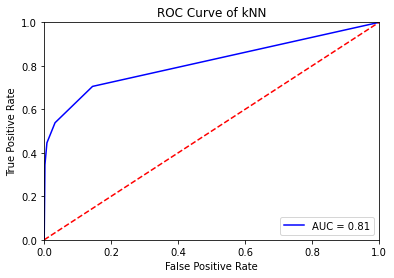

In [16]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Model - 3

In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/Course Projects/Project DMA/Data/CSV/x_test.csv')

In [ ]:
x_train.shape[0]/2
df = x_train

In [ ]:
col = x_train.columns
col

feat_col = col[:-22]
feat_col

Index(['Sample', 'time_step', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '808', '809', '810', '811', '812', '813', '814', '815', '816', '817'],
      dtype='object', length=819)

In [ ]:
# Training

targets = col[-22:]
for target in targets:

  print("Started Label -",target)

  X_train, X_test, y_train, y_test = train_test_split(df[feat_col],df[target],test_size=0.1)

  model = DecisionTreeClassifier()

  model.fit(X_train,y_train)

  pred = model.predict(X_test)

  saveModel(int(float(target)),model)

  actual = y_test

  fpr, tpr, thresholds = metrics.roc_curve(actual, pred)

  score = metrics.auc(fpr, tpr)

  print('AUC : ',score)
  print('Accuracy : ',model.score(X_test,y_test))

  print("Label Completed")


Started Label - 1.1
AUC :  0.9800564056184748
Accuracy :  0.9866666666666667
Label Completed
Started Label - 2.1
AUC :  0.8210007536392843
Accuracy :  0.991
Label Completed
Started Label - 3.1
AUC :  0.978050408023698
Accuracy :  0.985
Label Completed
Started Label - 4.1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


AUC :  nan
Accuracy :  0.9986666666666667
Label Completed
Started Label - 5.1
AUC :  0.9455051891682521
Accuracy :  0.9933333333333333
Label Completed
Started Label - 6.1
AUC :  0.6246662216288384
Accuracy :  0.9983333333333333
Label Completed
Started Label - 7.1
AUC :  0.856975800677772
Accuracy :  0.999
Label Completed
Started Label - 8.1
AUC :  0.5
Accuracy :  0.9996666666666667
Label Completed
Started Label - 9.1
AUC :  0.9442980777722174
Accuracy :  0.9956666666666667
Label Completed
Started Label - 10.1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


AUC :  nan
Accuracy :  1.0
Label Completed
Started Label - 11.1
AUC :  0.9310996563573883
Accuracy :  0.9916666666666667
Label Completed
Started Label - 12.1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


AUC :  nan
Accuracy :  0.9996666666666667
Label Completed
Started Label - 13.1
AUC :  0.9594943109987358
Accuracy :  0.9893333333333333
Label Completed
Started Label - 14.1
AUC :  0.7493319973279894
Accuracy :  0.9976666666666667
Label Completed
Started Label - 15.1
AUC :  0.5
Accuracy :  0.9996666666666667
Label Completed
Started Label - 16.1
AUC :  0.7496664442961973
Accuracy :  0.999
Label Completed
Started Label - 17.1
AUC :  0.9673369859442078
Accuracy :  0.9683333333333334
Label Completed
Started Label - 18.1
AUC :  0.5993311036789297
Accuracy :  0.996
Label Completed
Started Label - 19.1
AUC :  0.8451494939610106
Accuracy :  0.9966666666666667
Label Completed
Started Label - 20.1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


AUC :  nan
Accuracy :  1.0
Label Completed
Started Label - 21.1
AUC :  0.964937406128852
Accuracy :  0.9663333333333334
Label Completed
Started Label - 22.1
AUC :  0.7341208021928182
Accuracy :  0.9946666666666667
Label Completed


In [ ]:
targets = col[-22:]
for target in targets:

  print("Started Label -",target)

  X_train, X_test, y_train, y_test = train_test_split(x_train[feat_col],x_train[target],test_size=0.99)

  model = loadModel(int(float(target)))

  pred = model.predict(X_test)

  actual = y_test

  fpr, tpr, thresholds = metrics.roc_curve(actual, pred)

  score = metrics.auc(fpr, tpr)

  print('AUC : ',score)
  print('Accuracy : ',model.score(X_test,y_test))

  print("Label Completed")


Started Label - 1.1
AUC :  0.695991303788862
Accuracy :  0.9629181372395915
Label Completed
Started Label - 2.1
AUC :  0.7083650301922824
Accuracy :  0.9975325608270607
Label Completed
Started Label - 3.1
AUC :  0.7414347623776524
Accuracy :  0.9477360985309887
Label Completed
Started Label - 4.1
AUC :  0.6248672179292246
Accuracy :  0.9995080738357748
Label Completed
Started Label - 5.1
AUC :  0.7299014343608893
Accuracy :  0.8256603262849944
Label Completed
Started Label - 6.1
AUC :  0.550530879072645
Accuracy :  0.9984018906622524
Label Completed
Started Label - 7.1
AUC :  0.6805300486040126
Accuracy :  0.9366820751475778
Label Completed
Started Label - 8.1
AUC :  0.5453139809500995
Accuracy :  0.9965018583877315
Label Completed
Started Label - 9.1
AUC :  0.7312927912806565
Accuracy :  0.8537808039479027
Label Completed
Started Label - 10.1
AUC :  0.5127938598764765
Accuracy :  0.9960932213095126
Label Completed
Started Label - 11.1
AUC :  0.7164937535476151
Accuracy :  0.7692267649

In [ ]:
targets = col[-22:]
for target in targets:

  print("Started Testing for validation Label -",target)

  X_train, X_test, y_train, y_test = train_test_split(x_train[feat_col],x_train[target],test_size=0.99)

  model = loadModel(int(float(target)))

  pred = model.predict(X_test)

  actual = y_test

  fpr, tpr, thresholds = metrics.roc_curve(actual, pred)

  score = metrics.auc(fpr, tpr)

  print('AUC : ',score)
  print('Accuracy : ',model.score(X_test,y_test))

  print("Label validation testing Completed")


Started Testing for validation Label - 1.1
AUC :  0.8116091578899568
Accuracy :  0.9612208045942986
Label validation testing Completed
Started Testing for validation Label - 2.1
AUC :  0.5162989995079548
Accuracy :  0.9937686865397709
Label validation testing Completed
Started Testing for validation Label - 3.1
AUC :  0.9106374082448044
Accuracy :  0.9829341937775673
Label validation testing Completed
Started Testing for validation Label - 4.1
AUC :  0.49957070108953106
Accuracy :  0.9989935170658062
Label validation testing Completed
Started Testing for validation Label - 5.1
AUC :  0.8683194281569482
Accuracy :  0.9350966519641218
Label validation testing Completed
Started Testing for validation Label - 6.1
AUC :  0.5057415642279852
Accuracy :  0.9984754743790888
Label validation testing Completed
Started Testing for validation Label - 7.1
AUC :  0.7108538485878112
Accuracy :  0.9244989787158462
Label validation testing Completed
Started Testing for validation Label - 8.1
AUC :  0.59

In [ ]:
def matches(t):
  c1 = 0
  c2 = 0
  for i in range(0,len(t)-1,2):
    if(t[i]==t[i+1]):
      c1+=1
    else:
      c2+=1
  print('Matched:\t',c1,'\nNot Matched:\t',c2)

In [ ]:
def dropHalf(t):
  myList = []
  for i in range(0,len(t)-1,2):
    myList.append(t[i])
  return myList

In [ ]:
models = []

for i in range(1,23):
  model = loadModel(i)
  models.append(model)

In [ ]:
pred = []
i = 1
for model in models:
  print("Working with Model-"+str(i))
  t = model.predict(x_train[feat_col])
  matches(t)
  t = dropHalf(t)
  pred.append(t)
  print("Completed Model",i)
  i+=1

Working with Model-1
Matched:	 25236 
Not Matched:	 2090
Completed Model 1
Working with Model-2
Matched:	 27021 
Not Matched:	 305
Completed Model 2
Working with Model-3
Matched:	 26656 
Not Matched:	 670
Completed Model 3
Working with Model-4
Matched:	 27253 
Not Matched:	 73
Completed Model 4
Working with Model-5
Matched:	 26386 
Not Matched:	 940
Completed Model 5
Working with Model-6
Matched:	 27315 
Not Matched:	 11
Completed Model 6
Working with Model-7
Matched:	 25421 
Not Matched:	 1905
Completed Model 7
Working with Model-8
Matched:	 27140 
Not Matched:	 186
Completed Model 8
Working with Model-9
Matched:	 24484 
Not Matched:	 2842
Completed Model 9
Working with Model-10
Matched:	 27324 
Not Matched:	 2
Completed Model 10
Working with Model-11
Matched:	 23409 
Not Matched:	 3917
Completed Model 11
Working with Model-12
Matched:	 27324 
Not Matched:	 2
Completed Model 12
Working with Model-13
Matched:	 22928 
Not Matched:	 4398
Completed Model 13
Working with Model-14
Matched:	

In [ ]:
len(pred[0]), len(pred)

(27326, 22)

In [ ]:
# np.save('/content/drive/MyDrive/Course Projects/Project DMA/Data/Prediction-Output/Decision-tree/x_train_full-with-10,000/test.npy',pred)

In [ ]:
label_pred = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Prediction-Output/Decision-tree/x_train_full-with-10,000/test.npy')
label_pred.shape

(27326, 22)

In [ ]:
label_pred = label_pred.transpose()
label_pred.shape

(27326, 22)

In [ ]:
# np.save('/content/drive/MyDrive/Course Projects/Project DMA/Data/Prediction-Output/Decision-tree/x_train_full-with-10,000/test.npy',label_pred)

## Model - 4

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from math import exp
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import pytz
from datetime import datetime
import os
import csv
import sys
from scipy.stats import mode
import matplotlib.pyplot as plt

In [ ]:
# Parameters
layers = [256,128,64]

n_layer = len(layers)
dff = 128
dropout_rate = 0.0
model_name = 'LSTM' + str(layers)

earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.0001,
  patience=100,restore_best_weights=True)

reg_kernal, reg_activity = 1e-4,1e-4
kernel_regularizer=tf.keras.regularizers.l2(reg_kernal)
activity_regularizer=tf.keras.regularizers.l2(reg_activity)

activity_regularizer = None
lr = 0.005

epochs = 1000
batch_size = 2048
model_name

In [ ]:
experiment = 'LSTM'

X_train = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Input/X_train.npy')
X_val = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Input/X_val.npy')
X_test = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Input/X_test.npy')

label_train = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Output/label_train.npy')
label_val = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Output/label_val.npy')
label_test = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Prediction-Output/Decision-tree/x_train_full-with-10,000/test.npy')

label_cols = np.array(range(label_train.shape[1]//2))


X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
label_train = tf.convert_to_tensor(label_train, dtype=tf.float32)
label_val = tf.convert_to_tensor(label_val, dtype=tf.float32)
label_test = tf.convert_to_tensor(label_test, dtype=tf.float32)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)
print(label_train.shape, label_val.shape, label_test.shape)

In [ ]:
# Assigning weights for Labels 
class_weight = np.array([label_train.shape[0]/label_train.shape[1]/label_train.numpy()[:,i].sum() for i in range(label_train.shape[1])])
class_weight

In [ ]:
# Loss function calculates loss while prediction
def loss_func(w):
    def inner_loss(y,y_pred):
        loss = 0
        weights = w
        
        for i in range(len(weights)//2):
            
            y_i = y[:,2*i:2*i+2]
            y_pred_i = y_pred[:,2*i:2*i+2]
            w_i = weights[2*i:2*i+2]
            y_pred_i = tf.nn.softmax(y_pred_i,axis=1)
            loss_category = -tf.reduce_mean(y_i*tf.math.log(tf.clip_by_value(y_pred_i,1e-10,1.0)),axis=0)
            loss_i = tf.reduce_sum(loss_category*w_i)
            
            loss += loss_i

        return loss
    return inner_loss


class CustomMultiLossLayer(Layer):
    def __init__(self, nb_outputs, **kwargs):
        self.nb_outputs = nb_outputs 
        self.is_placeholder = True
        super(CustomMultiLossLayer, self).__init__(**kwargs)
        
    def build(self, input_shape=None):

        self.log_vars = []
        for i in range(self.nb_outputs):
            self.log_vars += [self.add_weight(name='log_var' + str(i), shape=(1,),
                                              initializer=Constant(0.), trainable=variance_on)]
        super(CustomMultiLossLayer, self).build(input_shape)


    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'vocab_size': self.vocab_size,
            'num_layers': self.num_layers,
            'units': self.units,
            'd_model': self.d_model,
            'num_heads': self.num_heads,
            'dropout': self.dropout,
        })
        return config

    def from_config(cls, config):
        return cls(**config)


    def multi_loss(self, y_true, y_pred, weights):
        loss = 0        
        for i in range(self.nb_outputs//2):
            
            y_i = y_true[:,2*i:2*i+2]
            y_pred_i = y_pred[:,2*i:2*i+2]
            w_i = weights[2*i:2*i+2]
            y_pred_i = tf.nn.softmax(y_pred_i,axis=1)
            loss_category = -tf.reduce_mean(y_i*tf.math.log(tf.clip_by_value(y_pred_i,1e-10,1.0)),axis=0)
            loss_category*=w_i
            vw = self.log_vars[2*i:2*i+2]
            p1, p2 = K.exp(-vw[0][0]*2), K.exp(-vw[1][0]*2)
            loss_i = p1*loss_category[0] + vw[0][0] + p2*loss_category[1] + vw[1][0]
            loss += loss_i
        
        return loss

    def call(self, inputs, weights):
        y_true = inputs[0]
        y_pred = inputs[1]
        loss = self.multi_loss(y_true, y_pred, weights)
        self.add_loss(loss, inputs=inputs)
        return y_pred

In [ ]:
# Training function with activation Sigmoid
def get_classifier_model(inp_dim1, inp_dim2, out_dim, weights, dff, rate):
    inp = Input(shape=(inp_dim1,inp_dim2))
    final_layer = tf.keras.Sequential([tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(dff)),
                                       Dense(dff, activation='sigmoid',
                                       activity_regularizer=activity_regularizer, kernel_regularizer=kernel_regularizer),
                                       tf.keras.layers.Dropout(rate),
                                       Dense(dff, activation='sigmoid',
                                       activity_regularizer=activity_regularizer, kernel_regularizer=kernel_regularizer),
                                       tf.keras.layers.Dropout(rate),
                                       tf.keras.layers.Dense(out_dim, activation='sigmoid',
                                       activity_regularizer=activity_regularizer, kernel_regularizer=kernel_regularizer)])
    y_pred = final_layer(inp)
    
    y_true = Input(shape=(out_dim,), name='y_true')
    out = CustomMultiLossLayer(nb_outputs=out_dim)([y_true, y_pred],weights)
    return Model([inp, y_true], out)

In [ ]:
# Training Model
classifier = get_classifier_model(inp_dim1 = X_train.shape[1],inp_dim2 = X_train.shape[2], out_dim=label_train.shape[1],
                                  weights=class_weight, dff=dff, rate=dropout_rate)
classifier.compile(loss=None, optimizer=tf.keras.optimizers.Adam(lr=lr))
hist = classifier.fit([X_train, label_train],label_train,
                    epochs=epochs,
                    batch_size = batch_size, 
                    verbose=0,
                    callbacks=[earlystop_callback],
                    validation_data=([X_val,label_val], label_val))

# AUC Score

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
label_pred = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Prediction-Output/Decision-tree/x_train_full/train.npy')

In [ ]:
label_train = np.load('/content/drive/MyDrive/Course Projects/Project DMA/Data/Output/label_train.npy')

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
def plot_roc_cur(fper, tper, title):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-' + title)
    plt.legend()
    # plt.savefig(plots_folder + 'roc.png')
    plt.show()
    
# label and label_pred both numpy arrays
def evaluate(label_pred, label, label_cols=range(11)):
    thresh = 0.5
    label_true = label
    
    # normalize so that pred_0 + pred_1 = 1
    for i in range(label_true.shape[1]//2):
        label_pred[:,2*i:2*i+2] = tf.nn.softmax(label_pred[:,2*i:2*i+2],axis=1)
        
    prob = label_pred*label_true
    
    print(': the overall accuracy is:', sum(sum(prob>thresh))/sum(sum(label>0)))
    print(': the overall recall is:', sum(sum(prob>thresh)[1::2])/sum(sum(label>0)[1::2]))
    
    meas_steps = label_cols
    result = pd.DataFrame(index=meas_steps, columns = ['tp','tn','fn','fp','tpr','fpr','min_dis', 'auc'])
    for i in range(len(meas_steps)):
        neg = prob[:,2*i]
        pos = prob[:,2*i+1]

        pos = pos[pos!=0]
        neg = neg[neg!=0]

        tp = sum(pos>thresh)
        fn = sum(pos<thresh)
        tn = sum(neg>thresh)
        fp = sum(neg<thresh)
        tpr = tp/(tp+fn+1e-9)
        fpr = fp/(fp+tn+1e-9)

        y_prob = np.append(pos, neg)
        y_true = np.append([1]*len(pos), [0]*len(neg))
        if len(pos) and len(neg):
            fper, tper, thresholds = roc_curve(np.append([1]*len(pos), [0]*len(neg)),np.append(pos, 1-neg))
            auc = roc_auc_score(np.append([1]*len(pos), [0]*len(neg)),np.append(pos, 1-neg))
            min_dis = np.sqrt(fper**2 + (1-tper)**2).min()
        else:
            min_dis = None
            auc = None
        result.iloc[i] = [tp,tn,fn,fp,tpr,fpr,min_dis,auc]
        
        plot_roc_cur(fper, tper, str(meas_steps[i]))
    
    total_sample = sum(sum(result[['tp', 'tn', 'fp', 'fn']].values))
    # final score
    result['score'] = (result.tp + result.tn + result.fp + result.fn)*result.auc/total_sample
    display(result)
    print(sum(result.score))

: the overall accuracy is: 0.6476229186522398
: the overall recall is: 0.44649532710280376


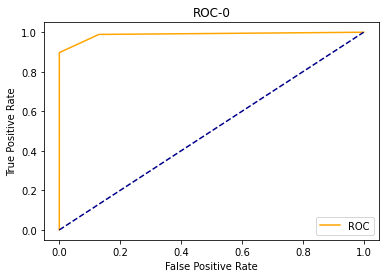

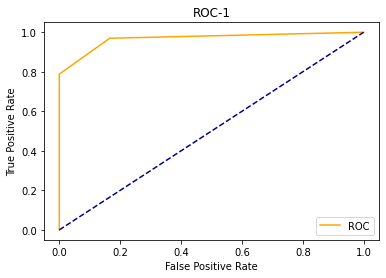

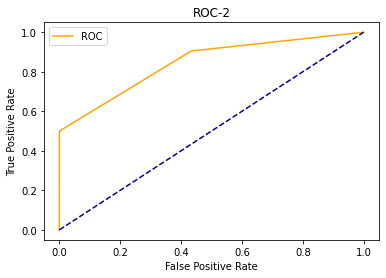

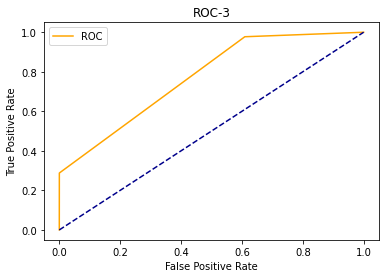

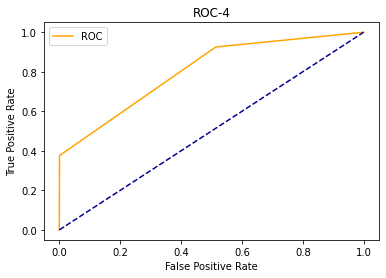

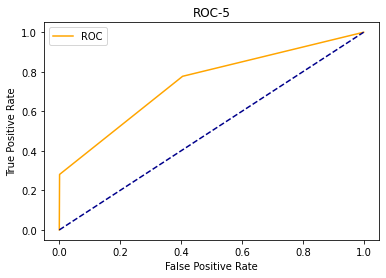

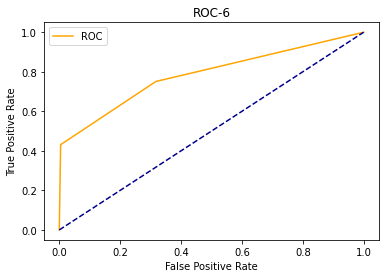

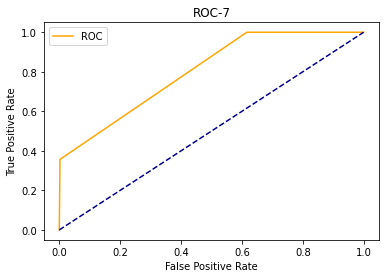

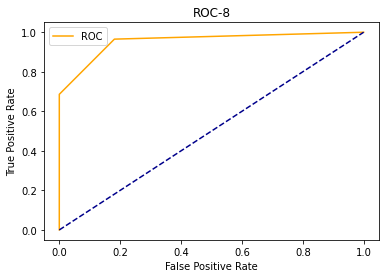

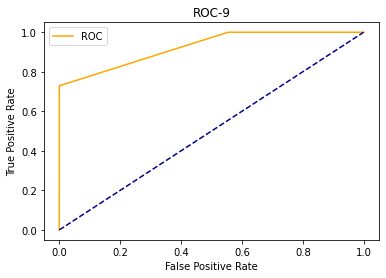

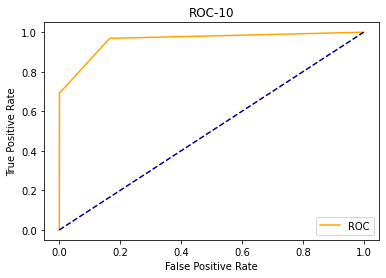

,tp,tn,fn,fp,tpr,fpr,min_dis,auc,score
0,244,5236,3,1,0.987854,0.000190949,0.102941,0.9877,0.0233136
1,26,8583,1,0,0.962963,0,0.168475,0.967271,0.0358458
2,100,24363,19,26,0.840336,0.00106605,0.443566,0.843908,0.0890205
3,38,4339,3,2,0.926829,0.000460723,0.610015,0.771497,0.014551
4,161,15938,32,26,0.834197,0.00162866,0.519406,0.801926,0.0557677
5,199,38077,158,58,0.557423,0.00152091,0.462361,0.74252,0.123017
6,734,80109,424,513,0.633851,0.00636303,0.403367,0.783586,0.275817
7,158,671,0,4,1,0.00592593,0.616133,0.800664,0.00287067
8,59,18361,3,1,0.951613,5.44603e-05,0.184374,0.954117,0.0756611
9,35,3509,0,1,1,0.0002849,0.270833,0.924867,0.0141118


0.8342724375100042


In [ ]:
evaluate(label_pred, label_train)

: the overall accuracy is: 0.9978971048513302
: the overall recall is: 0.9407407407407408


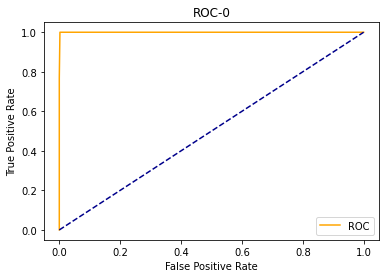

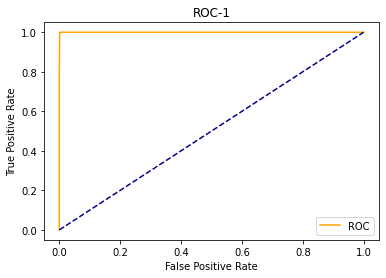

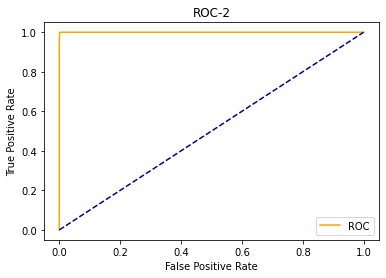

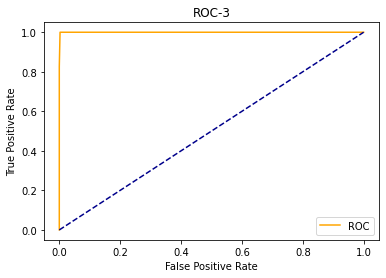

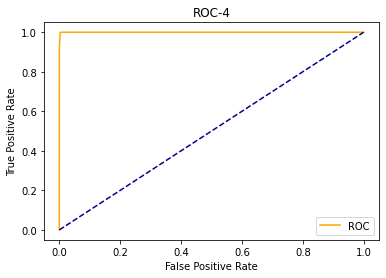

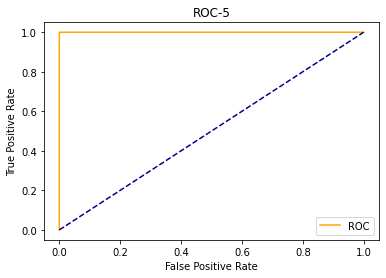

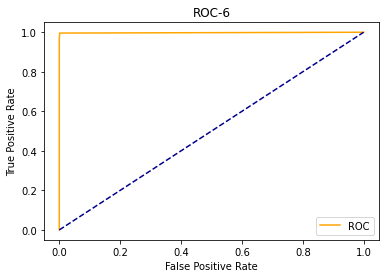

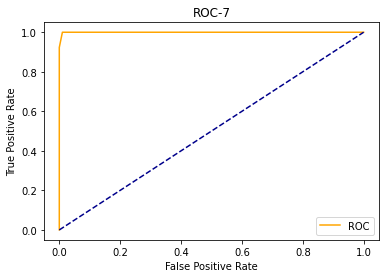

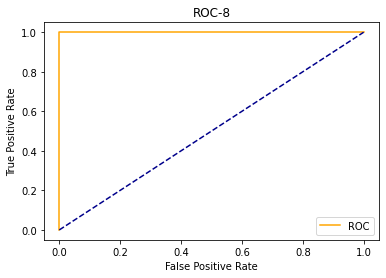

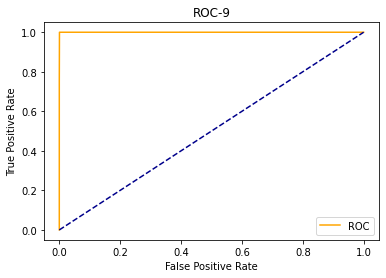

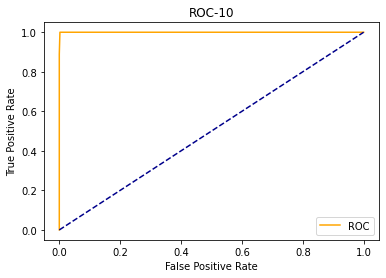

,tp,tn,fn,fp,tpr,fpr,min_dis,auc,score
0,10,1414,0,0,1,0,0.00211715,0.999756,0.0232554
1,4,1507,0,0,1,0,0.00132538,0.999867,0.024679
2,41,7783,0,0,1,0,0.00153945,0.999964,0.127801
3,19,1590,0,0,1,0,0.00250941,0.999782,0.0262774
4,84,4270,0,1,1,0.000234137,0.00303526,0.999767,0.0711226
5,63,11828,0,0,1,0,0.000422547,0.999984,0.194237
6,464,19638,2,0,0.995708,0,0.0043398,0.997902,0.327711
7,36,194,0,0,1,0,0.0102041,0.999608,0.00375559
8,6,4224,0,0,1,0,0,1,0.0690973
9,3,1787,0,0,1,0,0.000559284,0.99993,0.0292377


0.9992566317009474


In [ ]:
evaluate(label_pred, label_train)